In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports our predefined function
import functions
import Style_plot

# import bokeh code specific to outputting graphs in jupyter notebook
from bokeh.io import output_notebook, push_notebook,show

# This comand tells bokeh to output in the notebook
output_notebook()

Loading BokehJS ...

In the following representation, we have divided the project in five sections. 
1. Introduction, and explanation of our theory
2. Visually analyzing gold- and deathcross for Tesla
3.  Calculating and comparing our strategy with the Market
4. Conclusion on our strategy for Tesla
5. Looking at other companies 

# 1: Introduction, and explanation of our theory 
We got inspired by Lars Tvede’s book “Børshandlens psykologi" (The psychology of the stock market), to use python for analyzing stocks. In general, there is two basic analytical method to go around analyzing a stock – Fundamental and technical analysis. Fundamental analysis is what most people think of when analyzing a stock. Basically, you examine the key ratios of a business to determine its financial health. Technical analysis is much different in the sense of only using historical market data to predict future market behavior. Most professional investors combine these to create an edge over the market. In this assignment we will only be focusing on the technical aspect. Since python excel in plotting and attracting data from the internet, it’s a good tool to use for analyzing historical data. For our project we have chosen to analyze historical stock data, which we get from the yahoo-database. In this assignment we are trying to achieve the basic things, that’s necessary to know when you are doing a technical analysis. Which contains plotting and making it easily for future use to graph for other companies. Furthermore, adding a bit of technical aspects in form of pinpointing golden- and death cross and calculate the returns. A goldcross occurs, when the 50-day moving average of a stock price crosses above the 200-day moving average. For a deathcross it is the opposite. A deathcross occurs when the 50-day moving average crosses under the 200-day moving average, which signaling a change in momentum. 


# 2: Visually analyzing gold- and deathcross for Tesla
Let’s see how our theory look graphically, we are looking at the period 2015-2017. In figure 1, we are showing the two moving averages, and the stock price. The stock price is represented as a candlestick chart, which showcase price movements. Each candlestick shows one day, where the color of the candlestick is indicating the closing price compared to the opening price. If the closing price is higher than the opening price, the stick is green, and red if the closing price is lower than the opening price. Furthermore, we have added two text boxes and arrows, to indicate a gold- and deathcross. Though keep in mind, that each time the 200-day moving average and 50-day moving average is crossing, there is a gold- or deathcross. So, what do we expect and hope to see? We are expecting that a goldcross is a signal for a future price increase in the stock price. The deathcross is the opposite, and we are expecting to see, that deathcross is indicating a drop in the prices. 


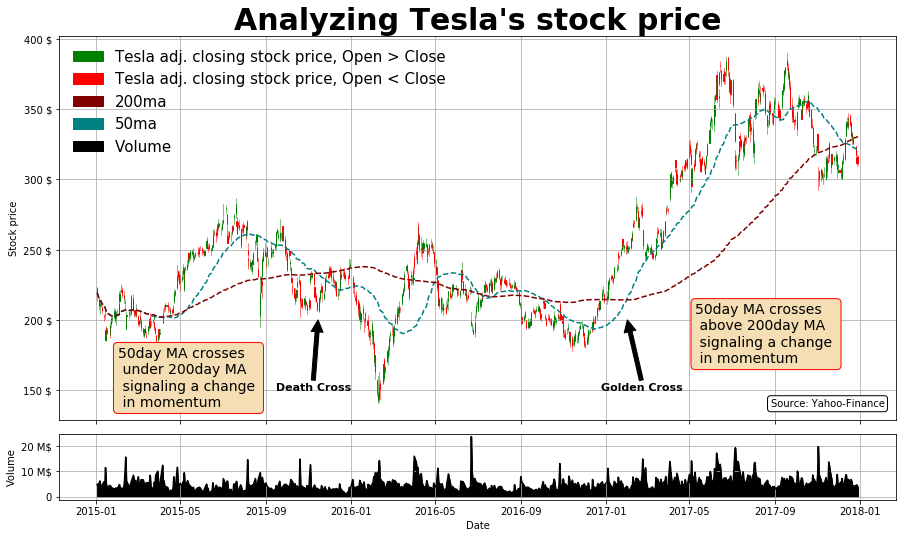

In [3]:
df = Style_plot.figure_1()

It is easy to see, that while the two crosses that we have pointed out, predicts the market well, the graph also has multiple (but smaller) crosses, where our prediction simply do not hold. Though we will not concern us we that, our main goal is not to predict the market with a perfect accuracy, but to do it better than the market.  It seems like the prediction is doing well, but we must go further down in the returns of our strategy, to see how we did. Let’s dig deeper down!

# 3:  Calculating and comparing our strategy with the Market
We have now calculated the returns of our strategy. This is still based on Tesla in the period 2015-2017. The strategy goes like this. Every time there is a goldcross we buy the stock and keep it until there occurs a deathcross, then we sell the stock and wait for another goldcross before we buy, which keeps going on. Additionally, we have added vertical lines in figure 2, that visualize when we sell and buy. We have also plotted the returns for Tesla, this is simply the returns of just buying the stock at day 1 and keeping it without ever selling it (Which we call the market, although it is only for one company). The return of the market is what we are comparing our strategy with. The benchmark of a good strategy is to beat the market, otherwise you could just buy index-stocks and follow the market. When the strategy line is flat, it is indicating that we are out of the stock and waiting for a new goldcross. If you want to know how we calculated and plotted our returns, simply look at the file which contains the code, there you will find explanations. Let’s see how we did. 


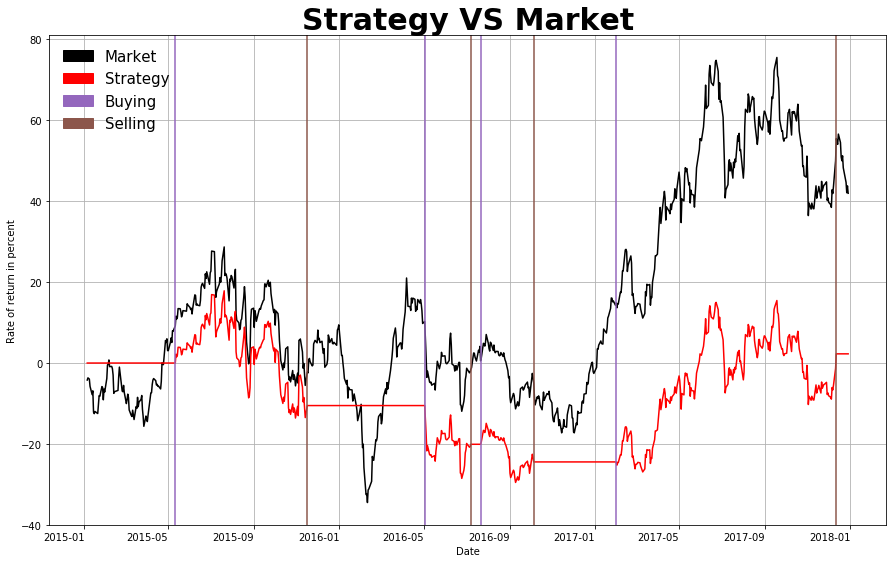

In [4]:
df = Style_plot.figure_2(df)

It does not take a keen eye to spot, that our strategy is underperforming with quite a big margin. This is to be expected, especially when we are using such a simple theory. Although it looks like our strategy is quite good at avoiding some of the big decreases in Tesla’s stock price. 

# 4: Conclusion on our strategy
So now we have calculated the difference in percentage points (Strategy minus the market), to make it even more precise how much we are underperforming the market. 


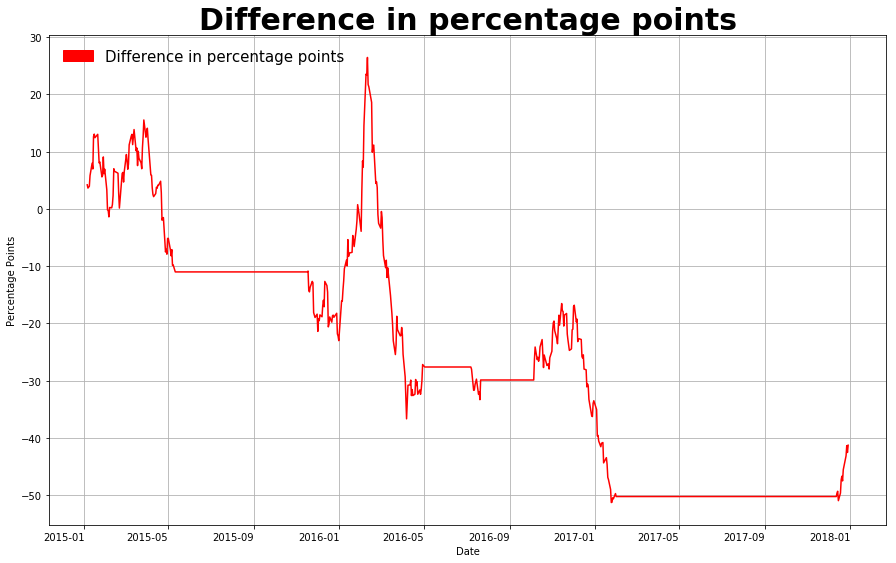

In [5]:
Style_plot.figure_3(df)

It is quite chocking that we are underperforming with such a big margin. It almost like we went for the worst possible strategy (or company) and tested it. Though you should keep in mind, that this is a simple theory and we have only tested it on one company (for now). Our underperforming might be due to the fact, that we are buying a bit high, since we are waiting for the 50-day moving average to cross 200-day moving average. This seems to make us skip out on a lot of the returns, especially when the market is bullish. We have now looked at how well our strategy would have done on Tesla-stocks. But now we want to go a bit broader, and show how it works for multiple stocks.

# More stocks
**Download data with function for plotting interactively**

We have now looked at how well our strategy would have done on Tesla-stocks. But now we want to go a bit broader, and show how it works for multiple stocks. <br>
This is basicly the same process as before, but scaled op to include potentially any stock in the Yahoo-database 

In [6]:
# First we choose which companys and indices we want
stock_list = ['TSLA', 'MAERSK-A.CO', 'VWS.CO', 'NOVO-B.CO', 'FB', 
              '^DJI', 'GOOG', 'VELO.CO', '^IXIC', 'INDY', '^N100','^GDAXI']
# For these companys we supply a name dictionairy, this is optional
stock_dict = {'TSLA': 'Tesla', 'MAERSK-A.CO':'Mærsk A','VWS.CO': 'Vestas',
              'NOVO-B.CO':'Novo Nordisk','^IXIC':'NASDAQ Composite',
             'FB':'Facebook','^DJI':'Dow Jones Industrial Average',
              'GOOG':'Google','VELO.CO':'Veloxis Pharmaceuticals', 
             'INDY': 'Indian top 50 index','^N100':'EURONEXT 100', 
              '^GDAXI':'German DAX index'}

In [7]:
d = functions.download_data(stocks=stock_list, from_year = 2015 , 
                            to_year = 2017, stock_dict = stock_dict)

This is the head of our initially downloaded dataset for TSLA:
Attributes        High         Low        Open       Close     Volume  \
Date                                                                    
2014-01-02  152.479996  146.550003  149.800003  150.100006  6188400.0   
2014-01-03  152.190002  148.600006  150.000000  149.559998  4695000.0   
2014-01-06  150.399994  145.240005  150.000000  147.000000  5361100.0   
2014-01-07  150.399994  145.250000  147.619995  149.360001  5034100.0   
2014-01-08  153.699997  148.759995  148.850006  151.279999  6163200.0   

Attributes   Adj Close  
Date                    
2014-01-02  150.100006  
2014-01-03  149.559998  
2014-01-06  147.000000  
2014-01-07  149.360001  
2014-01-08  151.279999  

 

Now we have added running means and deleted the earliest observations, that was used to create them:
Attributes        High         Low        Open       Close     Volume  \
Date                                                                    

At last we add the cumulative returns and now have a dataset that looks like this, for a single company:

In [8]:
d['Tesla'].head()

Attributes,Adj_Close,Close,High,Low,Open,Returns_cum,Strategy_cum,Volume,rm_200,rm_50
Date,,,,,,,,,,
2015-01-02,219.309998,219.309998,223.250000,213.259995,222.869995,NaN,NaN,4764400.0,230.212525,232.2970
2015-01-05,210.089996,210.089996,216.500000,207.160004,214.550003,-4.204095,-4.204095,5368500.0,230.198175,231.7930
2015-01-06,211.279999,211.279999,214.199997,204.210007,210.059998,-3.661483,-3.661483,6261900.0,230.217975,231.3138
2015-01-07,210.949997,210.949997,214.779999,209.779999,213.350006,-3.811956,-3.811956,2968400.0,230.210875,231.0994
2015-01-08,210.619995,210.619995,213.800003,210.009995,212.809998,-3.962429,-3.962429,3442500.0,230.221725,230.4564


**Plotting interactively**

This first plot is simply the adjusted closing price of all the stocks we have chosen. Feel free to view the multiple stocks and also experiment with the interaction options listed below

In [9]:
# This function plots the adjusted closing price all the companys in the symblos_list. 
functions.plot_close(d=d)

#This function has multiple interaction options:
#    If your hover your mouse over the plot it will show you additional information, 
#    about prices, date and also the volume traded a given day.
#The right of the figure has 5 options,
#    'Pan' you do this by presing and pulling with the mouse on the figure
#     'Box zoom', you press the option, and then you can zoom in on a chosen area 
#         by marking it with the mouse
#    'Reset' resets all the changes made with the above funtions
#    'Save' saves a picture of the figure on your computer
#    'Hover' toggles wether or not the hover option is active

#   Different companys is chosen in the bottom,
 #  For the interaction to be active, it has to be cell that that has most recetnly been run

    

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…

**Including the running means**

The next plot has the running means included. You can see, that for stocks with a constant growth trend, like Facebook or Google, the theory is almost constantly in by mode and appears viable. In the other end when stocks have long term drop trends, like for veloxis after 2016, the thoery stays out of the stock.
Although these conclusions are somewhat positive for our strategy, it still seems to allways 'comming in late' meaning that it som time for the strategy to respond to drops, since it operates on running means, so a drop or rise has to be active for 50 days for the theory to be fully activated.

In [10]:
functions.plot_close_mean(d)

# In addtion to having all the same features as the figure above,
# this figure also allows you to mute a chosen plot by mouse-clicking its name in the legend

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…

**Testing the theory against the simple return**

Now we, like earlier for Tesla, plot the cumulative return on keeping the stock in the intire considered period (Market) with the cumulative return had one utlilized the strategy.

In [11]:
functions.plot_returns(d)

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…

soo... are theory fails to ourperform the generel return on the stock in almost all of our considered cases, except for Indias top 50 index, Maersk and Veloxis. So this is not a very positve result for our theory. The common denominator of these stocks seems to be that they have all had drops in their share prices in the considered period. So maybe this theory, is not that jumping on the ship at the right time for huge price rises, but good at avoiding the biggest drops?

In [12]:
stocks  = ['TSLA', 'MAERSK-A.CO', 'VWS.CO', 'NOVO-B.CO', 'FB',
           'GOOG', 'VELO.CO','AAPL','ATVI','PNDORA.CO']
weights = np.full(len(stocks),1/len(stocks))

In [13]:
d2,portefolio_strategy_return, portefolio_return = functions.download_data(
    stocks=stocks, from_year = 2015 , to_year = 2017, printit=False, weights=weights)

In [14]:
p = functions.plotting('Date',['Market','Strategy'], d2.index, [portefolio_return, portefolio_strategy_return],
                   'Cumulative returns', title='Figure',legendlocation="top_center",y_unit=' %')
show(p, notebook_handle=True)

Overall tough we have to conclude that you'd be hard pressed to base an investing theory solely on these golden- and deathcrosses. 

![SegmentLocal](money_gif.gif "segment")

![SegmentLocal](Money_gif2.gif "segment")
![SegmentLocal](Money_gif3.gif "segment")